# Groupby, split-apply-combine and pandas

https://www.datacamp.com/community/tutorials/pandas-split-apply-combine-groupby

Do Netflix subscribers prefer older or newer movies?

# Data exploration with pandas

## Import data

In [2]:
# Import packages and set visualization style
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [5]:
# Import data and check out head of DataFrame
#df = pd.read_csv('data/chasewillden-netflix-shows/data/netflix.csv')
df = pd.read_excel('https://query.data.world/s/yu57ili2ono4xy4vaf6ucmeikhaywr')
df.head()

,title,rating,ratingLevel,ratingDescription,release year,user rating score,user rating size
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",80,2004,82.0,80
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",100,2006,NaN,82
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2016,98.0,80
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,90,2008,98.0,80
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,70,2014,94.0,80


## Summarizing data with plots and statistics

In [6]:
# Check out info of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
title                1000 non-null object
rating               1000 non-null object
ratingLevel          941 non-null object
ratingDescription    1000 non-null int64
release year         1000 non-null int64
user rating score    605 non-null float64
user rating size     1000 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


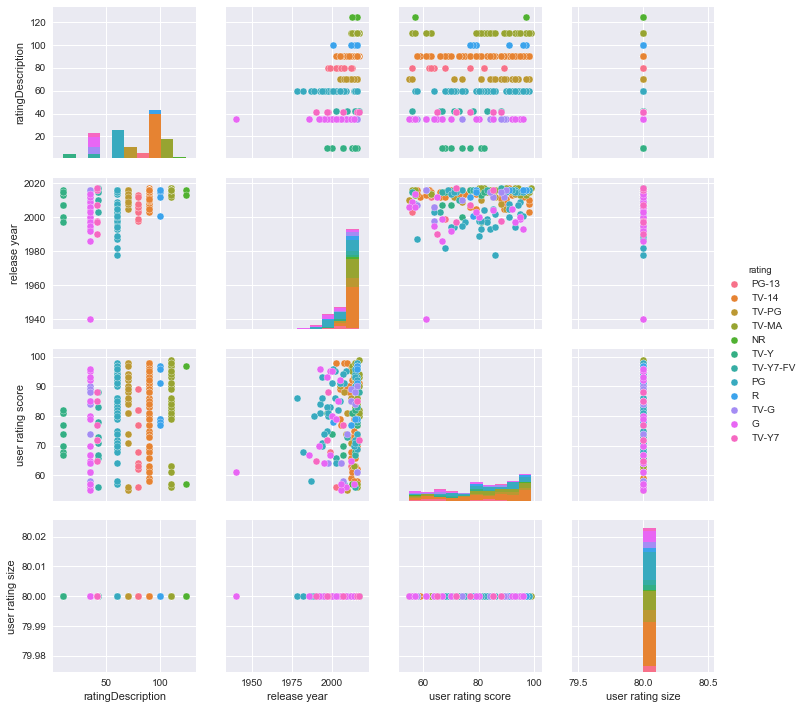

In [7]:
# Drop rows with missing values and drop duplicate
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Visualize pairplot of df
sns.pairplot(df, hue='rating');

In [8]:
# Get summary stats of df
df.describe()

,ratingDescription,release year,user rating score,user rating size
count,246.000000,246.000000,246.000000,246.0
mean,73.556911,2010.272358,81.390244,80.0
std,26.616145,8.887219,12.677883,0.0
min,10.000000,1940.000000,55.000000,80.0
25%,60.000000,2007.000000,71.000000,80.0
50%,80.000000,2015.000000,83.500000,80.0
75%,90.000000,2016.000000,92.750000,80.0
max,124.000000,2017.000000,99.000000,80.0


## Groupbys and split-apply-combine t answer the question

### Step 1. Split

In [10]:
# Group by year
df_by_year = df.groupby('release year')

### Step 2. Apply

In [12]:
df_by_year.describe().head()

ratingDescription                                          \
                         count  mean std   min   25%   50%   75%   max   
release year                                                             
1940                       1.0  35.0 NaN  35.0  35.0  35.0  35.0  35.0   
1978                       1.0  60.0 NaN  60.0  60.0  60.0  60.0  60.0   
1982                       1.0  60.0 NaN  60.0  60.0  60.0  60.0  60.0   
1986                       1.0  35.0 NaN  35.0  35.0  35.0  35.0  35.0   
1987                       1.0  60.0 NaN  60.0  60.0  60.0  60.0  60.0   

             user rating score        ...              user rating size        \
                         count  mean  ...    75%   max            count  mean   
release year                          ...                                       
1940                       1.0  61.0  ...   61.0  61.0              1.0  80.0   
1978                       1.0  86.0  ...   86.0  86.0              1.0  80.0   
1982                       1.0  68.0  ...   68.0  68.0              1.0  80.0   
1986                       1.0  67.0  ...   67.0  67.0              1.0  80.0   
1987                       1.0  58.0  ...   58.0  58.0              1.0  80.0   

                                                
             std   min   25%   50%   75%   max  
release year                                    
1940         NaN  80.0  80.0  80.0  80.0  80.0  
1978         NaN  80.0  80.0  80.0  80.0  80.0  
1982         NaN  80.0  80.0  80.0  80.0  80.0  
1986         NaN  80.0  80.0  80.0  80.0  80.0  
1987         NaN  80.0  80.0  80.0  80.0  80.0  

[5 rows x 24 columns]

In [13]:
list(df_by_year)[10]

(1995,             title rating                                ratingLevel  \
 766         Balto      G  General Audiences. Suitable for all ages.   
 967  Heavyweights     PG              some rude language and pranks   
 
      ratingDescription  release year  user rating score  user rating size  
 766                 35          1995               64.0                80  
 967                 60          1995               74.0                80  )

### Step 3. Combine

In [14]:
# Get median values by year and print first 5 rows
df_med_by_year = df_by_year.median()
df_med_by_year.head()

,ratingDescription,user rating score,user rating size
release year,,,
1940,35.0,61.0,80.0
1978,60.0,86.0,80.0
1982,60.0,68.0,80.0
1986,35.0,67.0,80.0
1987,60.0,58.0,80.0


In [15]:
# Print index of df
print(df.index)

Int64Index([  0,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            908, 911, 917, 931, 962, 966, 967, 972, 973, 979],
           dtype='int64', length=246)


In [16]:
# Print index
print(df_med_by_year.index)

Int64Index([1940, 1978, 1982, 1986, 1987, 1989, 1990, 1992, 1993, 1994, 1995,
            1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
            2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
           dtype='int64', name='release year')


Text(0,0.5,'median rating')

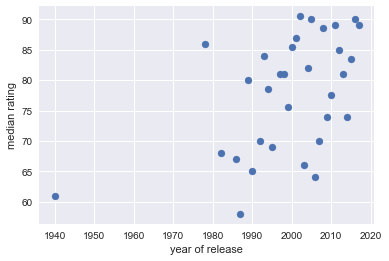

In [19]:
# Slice out user rating and plot
df_rat_by_year = df_med_by_year['user rating score']
plt.scatter(df_rat_by_year.index, df_rat_by_year)
plt.xlabel('year of release')
plt.ylabel('median rating')